In [1]:
# importing general packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

# importing XSPEC

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

# importing fits 

from astropy.io import fits

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rc('font', family='serif', size=20)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

%matplotlib inline

### Considering the number of counts from the background

In [13]:
# Now, let's obtain the background spectrum 

xs.AllData.clear()
average = xs.Spectrum("bn121225417_LAT-LLE_bkgspectra.bak{1}")
average.response = "bn121225417_LAT-LLE_weightedrsp.rsp"

xs.AllModels.clear()
m=xs.Model("pow")
xs.Fit.perform()

xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("ufspec") # this is unfolded spectrum

bkgX_average_uf= xs.Plot.x(1)
bkgY_average_uf = xs.Plot.y(1)
bkgXErrs_average_uf = xs.Plot.xErr(1)
bkgYErrs_average_uf = xs.Plot.yErr(1)


User entered plot commands:


/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


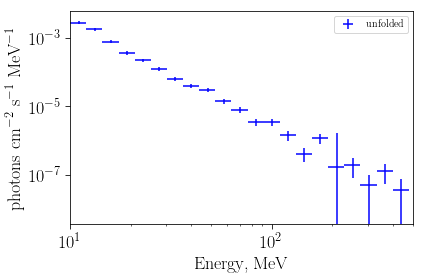

In [14]:
plt.errorbar(bkgX_average_uf, bkgY_average_uf, xerr = bkgXErrs_average_uf, yerr = bkgYErrs_average_uf, ls='none', color='b', label='unfolded')
plt.xlabel('Energy, MeV', fontsize=18)
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ', fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0, 5e2)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
eff_area_LLE = 10000. # assume the constant number for E0 ~ 10 to E1 ~ 300
delta_t = 25. # seconds
energy = bkgX_average_uf # energy array from the XSPEC plot
bkg_flux = bkgY_average_uf # unfolded background flux from XSPEC
print energy[8:16]

[48.0661640625, 57.788240234375, 69.47674609375, 83.529421875, 100.424453125, 120.73674609375, 145.1574921875, 174.5176953125]


In [5]:
from scipy import integrate
bkg_counts = integrate.simps(bkg_flux[8:16], energy[8:16])*delta_t*eff_area_LLE

In [6]:
print bkg_counts

137.11166977154062


### Considering the number of counts in the ALP signal

In [7]:
N = 1.61e-02 # cm^-2, normalization for the median background
SED10 = np.load('bn121225417_SED10.npy') 
SED10_norm = SED10*N

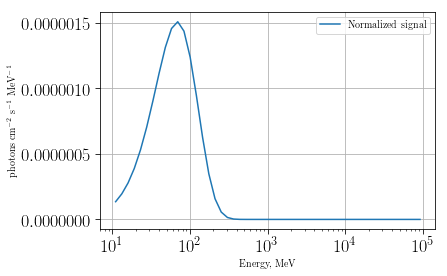

In [8]:
plt.plot(energy, SED10_norm, label='Normalized signal')
plt.xlabel('Energy, MeV')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xscale('log')
plt.grid()
plt.legend()

In [9]:
signal_counts = integrate.simps(SED10_norm[8:16], energy[8:16])*delta_t*eff_area_LLE

In [10]:
print signal_counts

32.49477334387733


In [12]:
np.sqrt(signal_counts) 

5.700418698997235